In [54]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./train_dataset.csv')

# 데이터 살펴보기
print(df.head())   
print('\n')

   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   35         170          85       97.0             0.9              0.9   
1   20         175         110      110.0             0.7              0.9   
2   45         155          65       86.0             0.9              0.9   
3   45         165          80       94.0             0.8              0.7   
4   20         165          60       81.0             1.5              0.1   

   hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
0              1               1       118          78  ...   70  142   
1              1               1       119          79  ...   71  114   
2              1               1       110          80  ...   57  112   
3              1               1       158          88  ...   46   91   
4              1               1       109          64  ...   47   92   

   hemoglobin  Urine protein  serum creatinine   AST   ALT  Gtp  \
0        19.8            

In [55]:
# 데이터 자료형 확인
print(df.info())
print("\n")

# 데이터 통계 요약정보 확인
print(df.describe())
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [56]:
# 흡연 여부 예측 데이터
# age : 5-years gap                             나이
# height(cm)                                    키
# weight(kg)                                    몸무게
# waist(cm) : Waist circumference length        허리 둘레
# eyesight(left)                                시력(왼쪽)
# eyesight(right)                               시력(오른쪽)
# hearing(left)                                 청각(왼쪽)
# hearing(right)                                청각(오른쪽)
# systolic : Blood pressure                     수축 혈압
# relaxation : Blood pressure                   이완 혈압
# fasting blood sugar                           공복 혈당
# Cholesterol : total                           콜레스트롤: 총계
# triglyceride                                  트리글리세리드
# HDL : cholesterol type                        콜레스테롤 유형
# LDL : cholesterol type                        콜레스테롤 유형
# hemoglobin                                    헤모글로빈
# Urine protein                                 소변단백질
# serum creatinine                              혈청 크레아티닌
# AST : glutamic oxaloacetic transaminase type  AST 온몸의 세포에서 발견되는 효소, 주로 심장과 간에 존재한다. 건강한 사람은 혈중 AST 수치가 낮다.
# ALT : glutamic oxaloacetic transaminase type  ALT 간과 신장 세포에서 발견되는 효소, 건강한 사람은 혈중 ALT 수치가 낮다.
# Gtp : γ-GTP                                   y-GTP 감마 지피티, 간장애가 생기면 혈중에 증가하게 된다.
# dental caries                                 충치
# smoking                                       흡연


# 1-1) 흡연 여부에 따른 평균 트리글리세리드
# 1-2 흡연 여부에 따라 그룹을 나누고 수축혈압의 최대 비교
# 1-3) 나이대에 따른 흡연자가 가장 적은 그룹

# 2-1) 흡연자들의 나이대 분포 (파이 그래프)
# 2-2) 비흡연자, 흡연자의 AST와 ALT 수치 (산점도)

In [57]:
# 흡연 여부에 따라 그룹을 나눈다.
smoking_grouped = df.groupby('smoking')

In [58]:
nosmoker=smoking_grouped.get_group(0)
smoker=smoking_grouped.get_group(1)

In [59]:
nosmoker

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0
6,40,175,90,95.0,0.9,1.0,1,1,130,88,...,39,102,16.5,1,1.0,19,22,19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38970,45,170,60,76.0,1.5,1.2,1,1,111,72,...,81,35,12.2,1,0.5,15,6,18,0,0
38976,40,165,60,85.0,0.7,0.8,1,1,140,90,...,55,93,14.7,3,1.0,33,40,54,0,0
38977,55,150,65,89.0,0.5,1.0,1,1,132,81,...,52,114,13.4,1,0.7,16,10,10,0,0
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,...,61,72,12.3,1,0.5,18,18,21,1,0


In [60]:
smoker

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
5,60,160,50,78.0,1.0,0.9,2,2,126,75,...,98,64,13.9,1,1.0,47,23,70,0,1
7,40,180,75,85.0,1.5,1.5,1,1,110,60,...,58,99,14.0,2,1.4,29,20,32,1,1
10,40,160,60,77.6,0.5,0.5,1,1,130,80,...,63,73,14.3,1,0.5,19,13,9,0,1
16,50,170,75,84.0,1.0,1.2,1,1,120,88,...,53,149,15.4,1,1.0,24,35,33,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38975,30,180,75,85.0,1.5,1.2,1,1,123,71,...,67,107,16.2,1,0.8,23,24,33,0,1
38978,40,170,65,77.0,1.5,1.5,1,1,110,62,...,79,91,16.1,1,0.9,28,43,36,1,1
38981,40,170,105,124.0,0.6,0.5,1,1,141,85,...,48,138,17.1,1,0.8,24,23,35,1,1
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,...,79,116,12.0,1,0.6,24,20,17,0,1


In [61]:
# 1-1) 흡연 여부에 따른 평균 트리글리세리드
smoking_grouped['triglyceride'].mean().rename(index = {0:"비흡연자", 1:"흡연자"})

smoking
비흡연자    113.015325
흡연자     150.409624
Name: triglyceride, dtype: float64

In [62]:
# 1-2 흡연 여부에 따라 그룹을 나누고 수축혈압의 최대 비교
smoking_grouped['systolic'].max().rename(index = {0:"비흡연자", 1:"흡연자"})

smoking
비흡연자    223
흡연자     233
Name: systolic, dtype: int64

In [63]:
# 1-3) 나이대에 따른 흡연자가 가장 적은 그룹
df.groupby('age')['smoking'].count().idxmin()

85

C:\Users\bmc05\AppData\Local\Temp\ipykernel_10284\4142054270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['count'] = 1


Text(0.5, 1.0, '흡연자 연령대 비율')

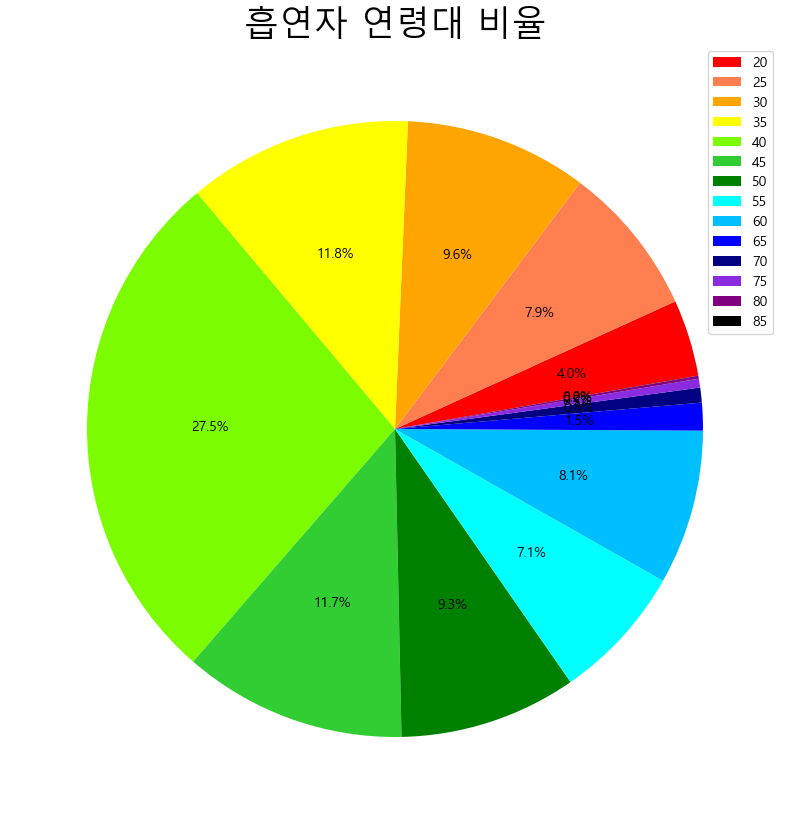

In [64]:
# 2-1) 흡연자들의 나이대 분포 (파이 차트)
df_age=smoker
df_age['count'] = 1
df_age=df_age.groupby('age').sum()
df_age_index=['20','25','30','35','40','45','50','55','60','65','70','75','80','85']

fig=plt.figure(figsize=(10,10)) # 캔버스 생성
fig.set_facecolor('white') # 캔버스 색 하얀색 설정
ax = fig.add_subplot() #  프레임 생성

pie = ax.pie(df_age['count'],
             startangle=10,
             counterclock=True,
             autopct='%1.1f%%',
             colors=['red','coral', 'orange', 'yellow', 'lawngreen', 'limegreen', 'green', 'aqua', 'deepskyblue', 'blue', 'navy', 'blueviolet', 'purple', 'black'])
plt.legend(pie[0],df_age_index)
ax.set_title('흡연자 연령대 비율', size=25)

# 분석결과:
# 40대가 가장 많이 흡연을 하는 것을 알 수 있다.

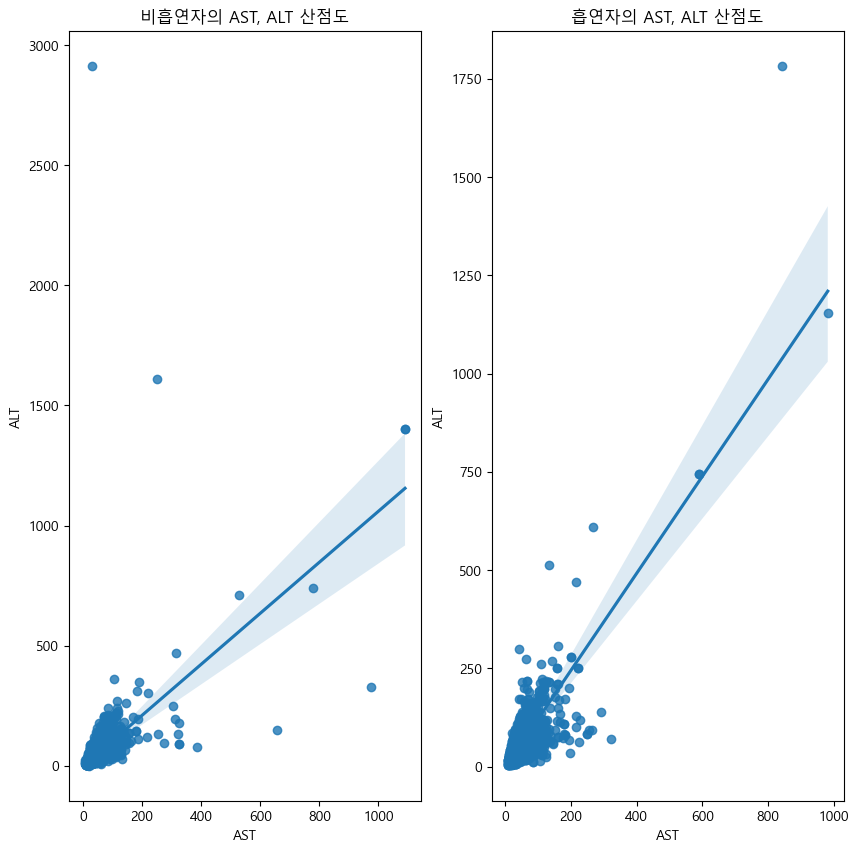

In [65]:
# 2-2) 비흡연자, 흡연자의 AST와 ALT 수치 (산점도)
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)
sns.regplot(x='AST', y='ALT', data=nosmoker, ax=ax1)
ax1.set_title('비흡연자의 AST, ALT 산점도')
ax1.set_xlabel('AST')
ax1.set_ylabel('ALT')
sns.regplot(x='AST', y='ALT', data=smoker, ax=ax2)
ax2.set_title('흡연자의 AST, ALT 산점도')
ax2.set_xlabel('AST')
ax2.set_ylabel('ALT')
plt.show()

# 분석결과: 
# 회귀선의 기울기가 흡연자 측이 더 크다. 즉, AST, ALT 수치가 높아 흡연자가 간이 더 좋지 않다는 것을 알 수 있다.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier       # KNN 분류 모형 가져오기

In [67]:
ndf = df[['triglyceride', 'Gtp', 'AST', 'ALT', 'smoking']]

In [68]:
X=ndf[['triglyceride', 'Gtp', 'AST', 'ALT']]
Y=ndf['smoking']

# train data와 test data로 구분(7:3 비율)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=100)
print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (27288, 4)
검증 데이터:  (11696, 4)


In [69]:
# 모형 객체 생성(k=10)로 설정
knn = KNeighborsClassifier(n_neighbors=10)

# train data를 가지고 모형 학습
knn.fit(X_train, Y_train)

# test data를 가지고 Y_hat을 예측(분류)
Y_hat = knn.predict(X_test)

print(Y_hat[0:10])
print(Y_test.values[0:10])

c:\Users\bmc05\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[1 0 0 0 1 0 1 0 0 0]
[1 0 0 0 1 0 1 0 0 0]


In [70]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(Y_test, Y_hat)
print(knn_matrix)

[[6233 1156]
 [2584 1723]]


In [71]:
# 검증
print ("Training Accuracy {}".format(knn.score(X_train, Y_train)))
print ("Testing Accuracy {}".format(knn.score(X_test, Y_test)))

c:\Users\bmc05\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Training Accuracy 0.7345353268836119


c:\Users\bmc05\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Testing Accuracy 0.6802325581395349
